GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aske (use `wandb login --relogin` to force relogin)



  | Name        | Type                 | Params
-----------------------------------------------------
0 | loss_fn     | MSELoss              | 0     
1 | down        | MaxPool2d            | 0     
2 | down_blocks | ModuleList           | 4.7 M 
3 | bottom      | Sequential           | 14.2 M
4 | up          | UpsamplingBilinear2d | 0     
5 | up_blocks   | ModuleList           | 12.5 M
6 | out         | Conv2d               | 130   
-----------------------------------------------------
31.4 M    Trainable params
0         Non-trainable params
31.4 M    Total params
125.514   Total estimated model params size (MB)


Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/ching/DIKU/bachelor/.venv/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/Users/ching/DIKU/bachelor/.venv/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:   0%|          | 0/23075 [00:00<?, ?it/s] 

/Users/ching/DIKU/bachelor/.venv/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:685: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


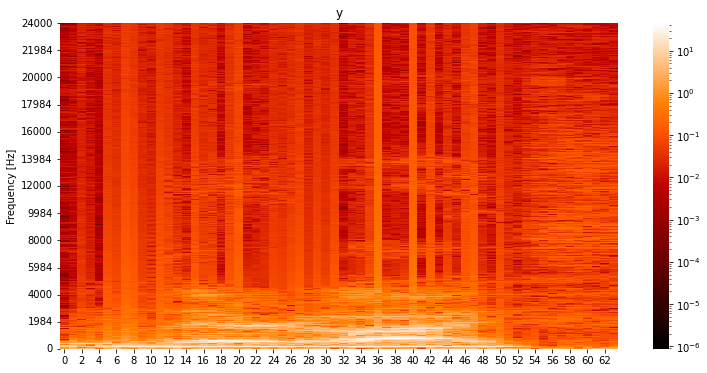

In [4]:
from importlib import reload
import main
import audio_utils
import baseline
import dataset
import model
import transforms
import data_module
import train

reload(audio_utils)
reload(baseline)
reload(dataset)
reload(model)
reload(transforms)
reload(data_module)
reload(train)
reload(main)

# main.main()
hparams = {
    "lr": 1e-3,
    "batch_size": 1,
    "stft_height": 751,
    "stft_width": 64,
    "n_fft": None,
    "data_dir": "../data",
    "wandb": True,
    "num_blocks": 4,
    "accelerator": "auto", 
    #"gpus": -1, 
    "auto_select_gpus": True, 
    "log_n_samples": True, 
    "num_workers": 0, 
    "log_every_n_steps": 1, 
}

train.train_from_dict(hparams)